#Week 1

## BUilding XOR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

#rcParams['figure.figsize'] = 12, 6

RANDOM_SEED = 56

np.random.seed(RANDOM_SEED)

In [ ]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0],   [1],   [1],   [0]])

In [ ]:
colors = ['green' if y_ == 1 else 'blue' for y_ in y] 

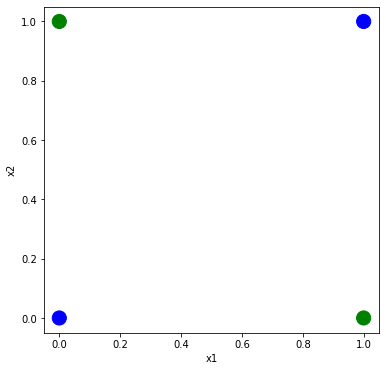

In [ ]:
fig = plt.figure(figsize = (6,6))
plt.scatter(X[:,0],X[:,1],s=200,c=colors)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In the input layer we feed the two values $x_1$ and $x_2$ which we summarize into an input vector $\mathbf{x} = [x_1, x_2]^T \in \{0, 1\}^2$. The hidden layer does some computation and the output layer produces the result $\hat{y} \in \mathbb{R}$. The associated *weights* with each layer - aka learnable parameters of the network - are matrices $\mathbf{W}_1 \in \mathbb{R}^{2 \times 3}$ and $\mathbf{W}_2 \in \mathbb{R}^{3 \times 1}$. We can also write this down in a more mathematical way:

$$\mathbf{a} = g\left(\mathbf{h}\right) = g\left( \mathbf{x}^\mathrm{T}\mathbf{W}_1 \right)$$
$$\hat{y} = \mathbf{a}^\mathrm{T}\mathbf{W}_2$$

Here, the function $g$ is an activation function, which is not explicitly shown in the above image. The choice of the activation function is crucial - we will come back to this later.

### Building Blocks
With this preliminaries out of the way, we are ready to implement our neural network and training procedure. For this, we need to implement the following building blocks:

* An **activation function**, i.e. $g$
* The **forward pass**, i.e. computing $\hat{y}$.
* A **loss function**, i.e. a quantity that measures how far away $\hat{y}$ is from the true value $y$.
* The **backward pass**, i.e. computing the gradients w.r.t. the loss function
* An **optimizer**, i.e. an algorithm that updates the trainable weights of the network based on the gradients


*   DNNs are linear layers + non -linear activation function. 

*   MLP algo uses step-function as activation 

* DNNs have diff. activation funcs.



In [ ]:
def sigmoid(x):
  return 1/ (1+ np.exp(-x))

def sigmoidDerivative(x):
  return x * (1-x)

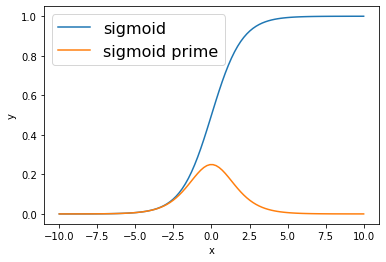

In [ ]:
x = np.linspace(-10., 10., num=100)
sig = sigmoid(x)
sig_prime = sigmoidDerivative(sig)

plt.plot(x, sig, label="sigmoid")
plt.plot(x, sig_prime, label="sigmoid prime")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(prop={'size' : 16})
plt.show()

In [ ]:
def dense(inputs, weights):
    """A simple dense layer."""
    return np.matmul(inputs, weights)

In [ ]:
input_size = 2
hidden_size = 3
output_size = 1

def initialize_weights(input_sz, hidden_sz, output_sz):
    # weights for hidden layer, shape: 2x3
    w1 = np.random.uniform(size=(input_sz, hidden_sz))
    # weights for output layer, shape: 3x1
    w2 = np.random.uniform(size=(hidden_sz, output_sz))
    return w1, w2
    
w1, w2 = initialize_weights(input_size, hidden_size, output_size)

# Week 2

## Loss functions

In [10]:
def mseLoss(y_hat, y):
    residual = y_hat - y
    error = np.mean((residual ** 2) ** 0.5)
    return residual, error

In [11]:
def KLdivLoss(y_hat, y):
  return

In [12]:
def JSdivLoss(y_hat, y):
  return

## Regularizers

In [ ]:
def ridge(): #L1


In [ ]:
def lasso():  #L2


## Optimizers

In [ ]:
def SGD():
  

## Three-layer MLP

we need

1.   forward pass -
  + calculate outputs
  + activation fn to convert o/ps

2.   backward pass
  + compute loss fn
  + adjust weights 
  + regularizers for overfitting issue
  + optimizers

### MLP on MNIST dataset
Considering MNIST dataset, how can you use MLP to classify those digits?

Develop your own codes to handle with it. Pay attention on bias, learning rates, batchsize and epoches.

In [ ]:
#@title
# load data
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import time
import warnings
warnings.filterwarnings("ignore")

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

n = 100
plt.figure(figsize=(10, 10))
for i in range(n):
  # display original
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(x_train[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

X = x_train.reshape(60000,28*28).T
y = y_train

digits = 10
examples = y.shape[0]
y = y.reshape(1, examples)
Y = np.eye(digits)[y.astype('int32')]
Y = Y.T.reshape(digits, examples)


X2 = x_test.reshape(10000,28*28).T
y2 = y_test

examples = y2.shape[0]
y2 = y2.reshape(1, examples)
Y2 = np.eye(digits)[y2.astype('int32')]
Y2 = Y2.T.reshape(digits, examples)


In [19]:
x_train.shape

(60000, 28, 28)

#### Activation function

In [47]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_(y):
  return y * (1-y)

def softmax(x):
  #math.exp(-x) / sum of math.exp(-x) for all x
  return;

### NN arch

In [56]:
def initialize_weights(input_sz, hidden_sz, output_sz):
    # weights for hidden layer, shape: 784x 196
    w1 = np.random.uniform(size=(input_sz, hidden_sz))
    # weights for output layer, shape: 196 x 10
    w2 = np.random.uniform(size=(hidden_sz, output_sz))
    return w1, w2

#### forward pass

In [6]:
def dense(inputs, weights):
    return np.matmul(inputs, weights)

In [62]:
def forward_pass(X, w1, w2):
    # Step 1: Calculate weighted average of inputs (output shape:  784x 196)
    net_hidden = dense(X, w1)
    
    # Step 2: Calculate the result of the sigmoid activation function (shape: )
    act_hidden = sigmoid(net_hidden)
    
    # Step 3: Calculate output of neural network (output shape: 196 x10)
    y_hat = dense(act_hidden, w2)
    
    return act_hidden, y_hat

#### backward pass

In [64]:
def backward_pass(X, y_hat, y, w1, w2, act_hidden):
    # Step 1: Calculate error
    residual, error = mse(y_hat, y)
    
    # Step 2: calculate gradient wrt w2
    N = X.shape[0]
    dL_dy = 1.0 / N * residual  # shape (4, 1)
    dy_dw2 = act_hidden  # shape (4, 3)
    dL_dw2 = np.matmul(dL_dy.T, dy_dw2)  # shape (1, 3)
    
    # According to the math, `dL_dw2` is a row-vector, however, `w2` is a column-vector.
    # To prevent erroneous numpy broadcasting during the gradient update, we must make
    # sure that `dL_dw2` is also a column-vector.
    dL_dw2 = dL_dw2.T
    
    # Step 3: calculate gradient wrt w1
    dL_dw1 = 1.0 / N * np.matmul(X.T, np.matmul(residual, w2.T) * sigmoid_(act_hidden))
    
    return dL_dw2, dL_dw1, error

#### training

In [65]:
# define your network architecture
input_size = 784
hidden_size = 196 #250
output_size = 10

# initialize and start training with epoches and batches
n_epochs = 100
learning_rate = 1.2
training_errors = []

w1, w2 = initialize_weights(input_size, hidden_size, output_size)
#for epoch in range(n_epochs):
 
# Step 1: forward pass
act_hidden, y_hat = forward_pass(X.T, w1, w2)

# Step 2: backward pass
dw2, dw1, error = backward_pass(X, y_hat, y, w1, w2, act_hidden)

# Step 3: apply gradients scaled by learning rate
w2 = w2 - learning_rate * dw2
w1 = w1 - learning_rate * dw1
    
    # Step 4: some book-keeping and print-out
    # if epoch % 200 == 0:
    #     print('Epoch %d> Training error: %f' % (epoch, error))
    # training_errors.append([epoch, error])

# Plot training error progression over time
training_errors = np.asarray(training_errors)
plt.plot(training_errors[:, 0], training_errors[:, 1]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

TypeError: ignored

In [48]:
res1 = forward_pass(X.T, w1, w2) # get y_hat from forward pass

In [50]:
for i in range(len(res1)):
  yhat = res1[i]
  y = y_train[i]
  residual, mse = mseLoss(yhat, y )